# Cooperative Coevolution of Predator Robots

In [34]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from optim.BSO.bso import bso
from optim.naive.naive import naive
from prey.prey import smartLinear
from visual.visual import Plot

## Define Testing Grid

In [35]:
grid = 30
Ns = 8
Np = 1
n_prey = 1

## Iteration

All preys caputured with 31 steps


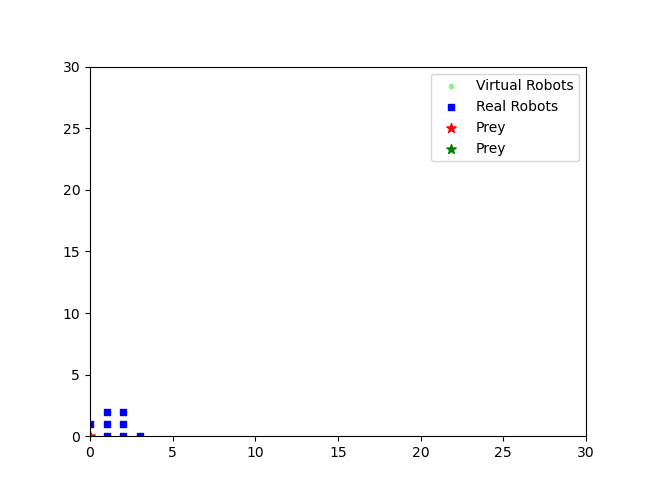

In [36]:
# Define population
p_robots = np.random.randint(0, grid, (Ns, Np, 2))
preys = np.random.randint(0, grid, (n_prey, 2))
captured = np.zeros(n_prey, dtype=np.bool)
plotter = Plot(grid)

T = 100
for t in range(T):
    # Prey move
    preys_copy = preys.copy()
    for p in range(len(preys)):
        target = smartLinear(p_robots[:, 0], preys_copy, p, grid)
        if target is not None:
            preys[p] = target
        else:
            captured[p] = True
    # Delete captured preys
    preys = preys[~captured]
    captured = captured[~captured]
    if not len(captured):
        break
    # Robots move
    naive(p_robots, preys, grid)
    plotter.update(p_robots, preys)
    
# Save result
if not len(captured):
    print(f'All preys caputured with {plotter.cnt} steps')
else:
    print(f'Failed to capture all within {plotter.cnt} steps')
plotter.save(file='example.gif', fps=2)

## Batch Test

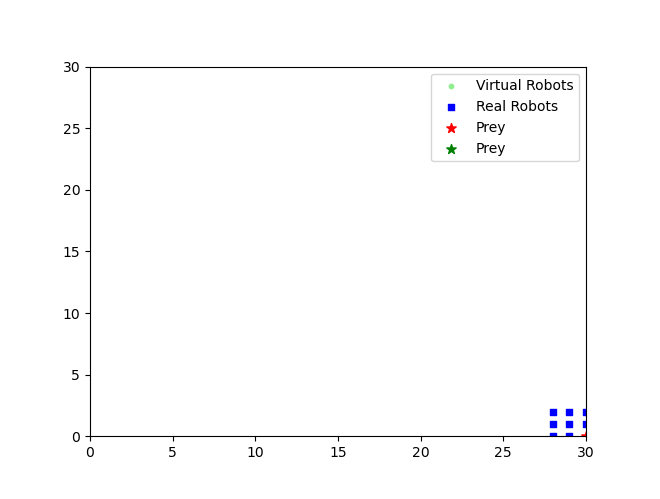

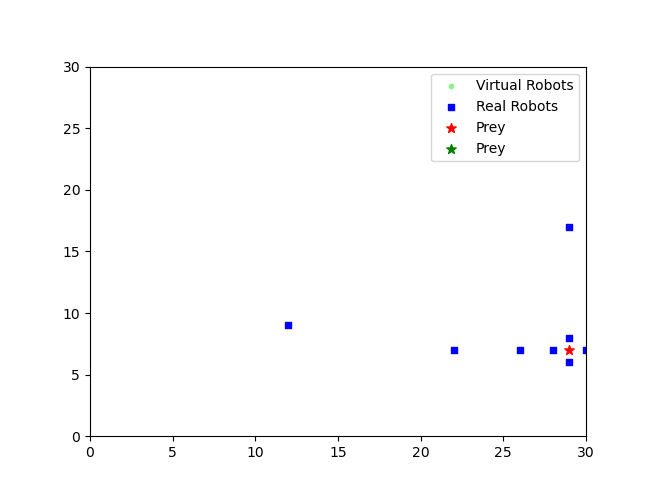

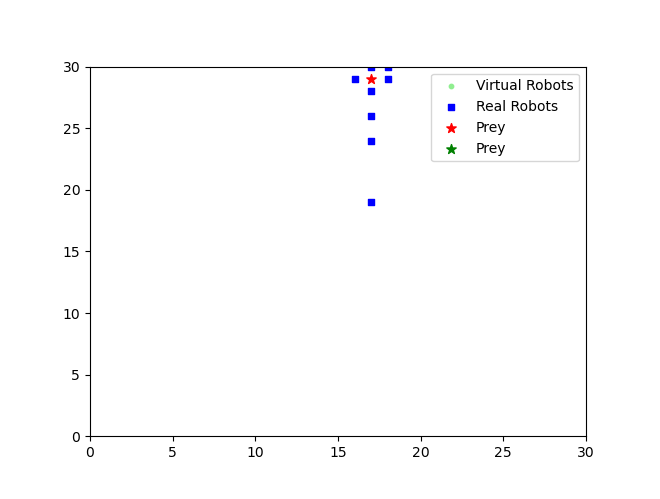

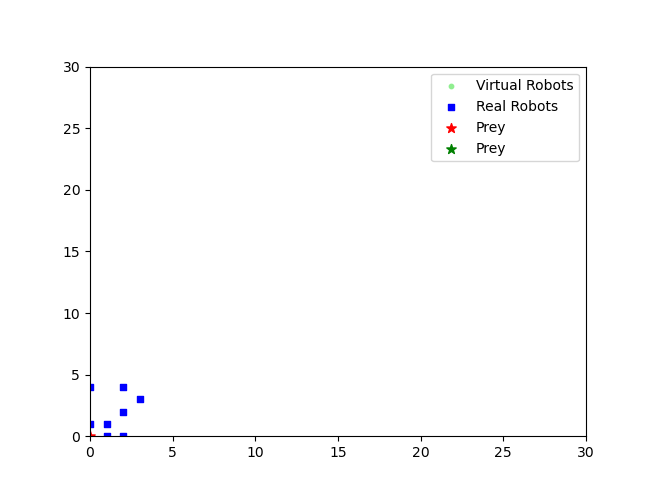

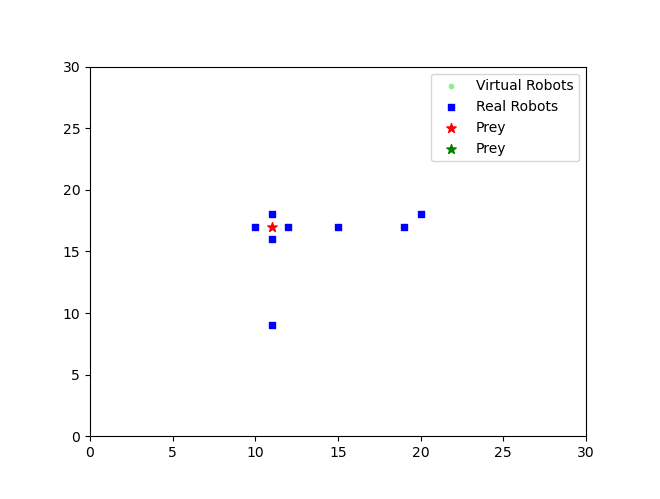

In [37]:
T = 100
batch_size = 5
folder = time.strftime("%Y-%m-%d_%H-%M-%S", time.localtime(time.time()))
os.makedirs(os.path.join('output', folder), exist_ok=True)
with open('output\\'+folder+'\\record.txt', 'w', encoding='utf-8') as file:
    file.write(f'Predators={Ns}, Grid={grid}*{grid}\n')
    for i in range(batch_size):
        p_robots = np.random.randint(0, grid, (Ns, Np, 2))
        preys = np.random.randint(0, grid, (n_prey, 2))
        captured = np.zeros(n_prey, dtype=np.bool)
        plotter = Plot(grid)
        for t in range(T):
            preys_copy = preys.copy()
            for p in range(len(preys)):
                target = smartLinear(p_robots[:, 0], preys_copy, p, grid)
                if target is not None:
                    preys[p] = target
                else:
                    captured[p] = True
            preys = preys[~captured]
            captured = captured[~captured]
            if not len(captured):
                break
            naive(p_robots, preys, grid)
            plotter.update(p_robots, preys)
        if not len(captured):
            file.write(f'Moves={plotter.cnt}\n')
        else:
            file.write(f'Failed\n')
        plotter.save(file=os.path.join(folder, f'test_{i}.gif'))

## Analysis

Capture Rate: 100.0%
Avg Move: 18.0
Move Std: 10.019980039900279


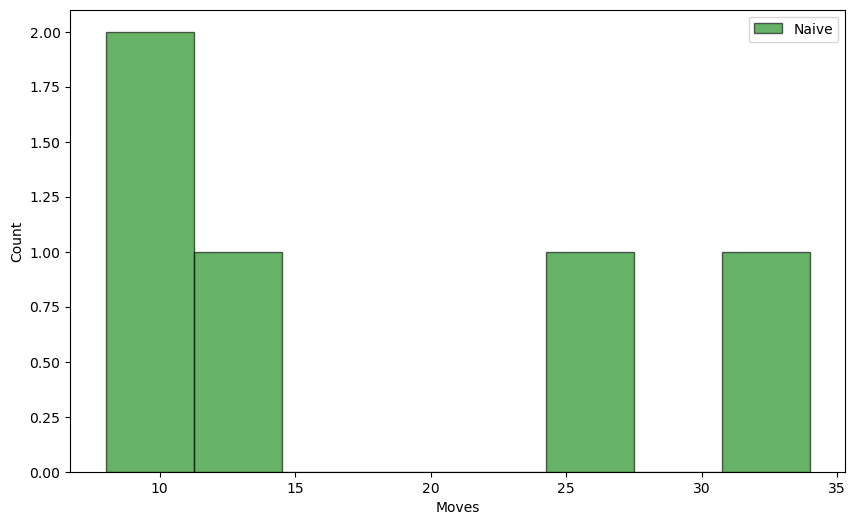

In [38]:
r = []
success = 0
total = 0
with open('output\\'+folder+'\\record.txt', 'r') as file:
    lines = file.readlines()
for line in lines:
    line = line.strip()
    if line.startswith('Moves'):
        number = line.split('=')[1].strip()
        r.append(int(number))
        success += 1
    total += 1
print(f'Capture Rate: {success / (total - 1) * 100}%')
print(f'Avg Move: {np.mean(r)}')
print(f'Move Std: {np.std(r)}')
plt.figure(figsize=(10, 6))
plt.hist(r, bins=8, alpha=0.6, color='green', label='Naive', edgecolor='black')
plt.xlabel("Moves")
plt.ylabel("Count")
plt.legend()